# Uniformity

In [1]:
import pandas as pd
import datetime as dt
banking = pd.read_csv("data/banking_dirty.csv")
banking.columns

Index(['Unnamed: 0', 'cust_id', 'birth_date', 'Age', 'acct_amount',
       'inv_amount', 'fund_A', 'fund_B', 'fund_C', 'fund_D', 'account_opened',
       'last_transaction'],
      dtype='object')

In [2]:
# acct_eu = banking['acct_cur'] == 'euro'
# banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
# banking.loc[acct_eu, 'acct_cur'] = 'dollar'
# assert banking['acct_cur'].unique() == 'dollar'

In [3]:
banking['account_opened'] = pd.to_datetime(banking['account_opened'], errors='coerce')

C:\Users\CIRO\AppData\Local\Temp\ipykernel_11328\173344944.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'], errors='coerce')


In [4]:
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')
banking['acct_year']

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object

# Cross field Validation

In [5]:
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]


In [7]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'])
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year
age_equ = banking['Age'] == ages_manual

In [8]:
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


# Completeness

In [12]:
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:

banking.isna().sum()


Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64

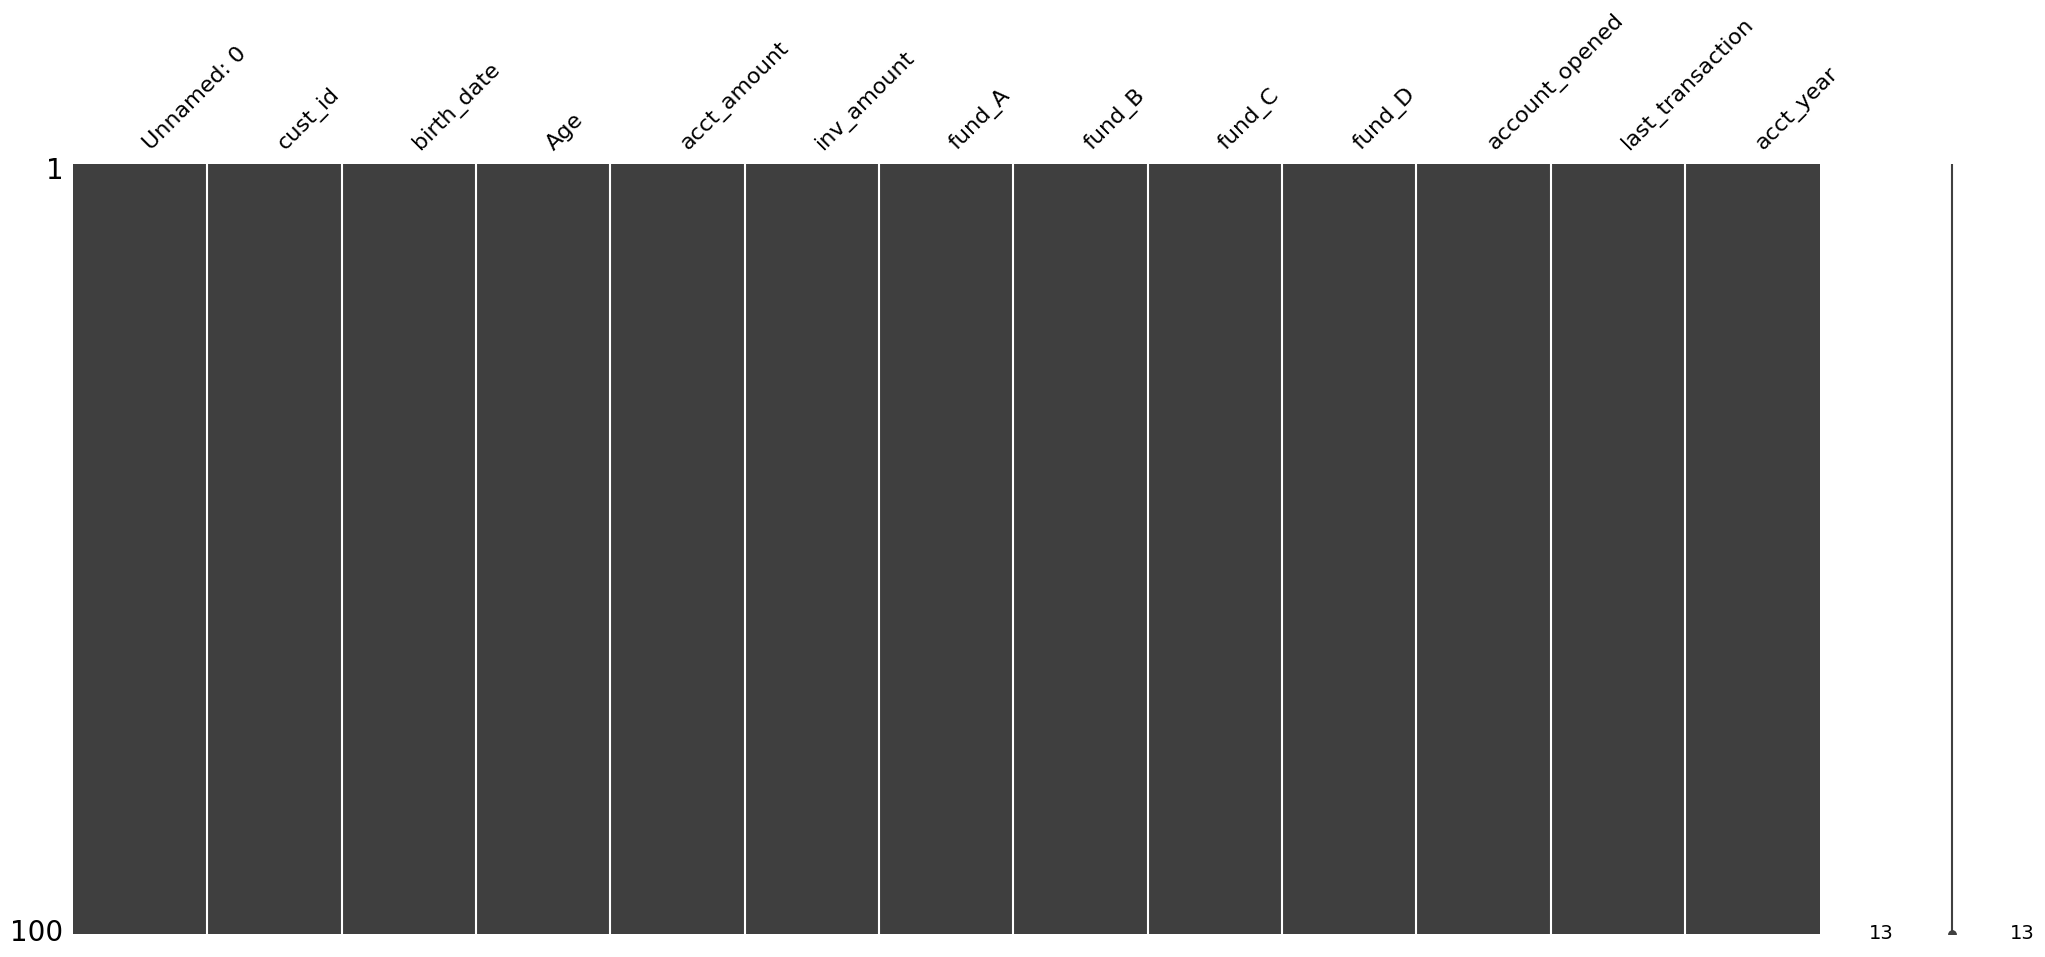

In [13]:
msno.matrix(banking)
plt.show()